<center> <img src = "https://miro.medium.com/max/1400/1*f7m92eei7PE8gFyaCQnXMw.jpeg"></center><br>

# <center>👨‍💻 | Loan Default Prediction 💰</center><br><br>
# Introduction <br>
Loans are an essential part of our economy.People borrow money from financial institutions all the time, either for starting a business, emergency expenses, vehicle financing, vacation costs, or education costs. <br><br>
However, when lending money to someone, there is always the risk that that person may not be able to pay you back. When it comes to financial institutions, such as banks, that borrow large amounts of money to many different people for many different reasons, the risk of losses from defaults gets exponentially higher.<br><br>
For this reason, it is extremely important that financial institutions avoid loans to people that are highly likely to default, and they usually invest a lot of time and resources in background checks on people to avoid having losses. In this notebook, I'll develop a machine learning model that will be able to predict how likely a client is to default based on whether or not he's employed, his bank balance, and his annual salary. 

<h1 style = "border-bottom: 3px solid black; padding: 8px"><b>1 | Importing Libraries</b></h1>

In [57]:
# Installing PyCaret
# !pip install --ignore-installed pycaret --user

In [58]:
import pandas as pd, numpy as np, plotly.express as px, matplotlib.pyplot as plt, seaborn as sns
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

<h1 style = "border-bottom: 3px solid black; padding: 8px"><b>2 | Exploratory Data Analysis</b></h1>

In [59]:
# Loading data and visualizing dataframe
df = pd.read_csv('../input/loan-default-prediction/Default_Fin.csv')
df

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


<h3 style = "border-bottom: 3px solid black; padding: 8px"><b>About the Dataset</b></h3>

To develop this loan default predictor, we have a dataset with a total of **10,000** clients and **four different attributes**: <br><br>
> - **Employed**: 1 for employed and 0 for unemployed;<br><br>
> - **Bank Balance**: The amount of money that client had available in their account at the moment the data was obtained;<br><br>
> - **Annual Salary**: The annual salary of each client;<br><br>
> - **Defaulted?**: This is our **target variable** and it's filled of 0 for each client who **didn't default** and 1 for each client who **defaulted their loans**.<br><br>

Let's use some **EDA** to see how balanced the target variable is and how it interacts with other attributes!

In [60]:
# Checking null values 
df.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [61]:
# Renaming target variable
df.rename({'Defaulted?':'Defaulted'}, axis = 1, inplace = True)
df

,Index,Employed,Bank Balance,Annual Salary,Defaulted
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


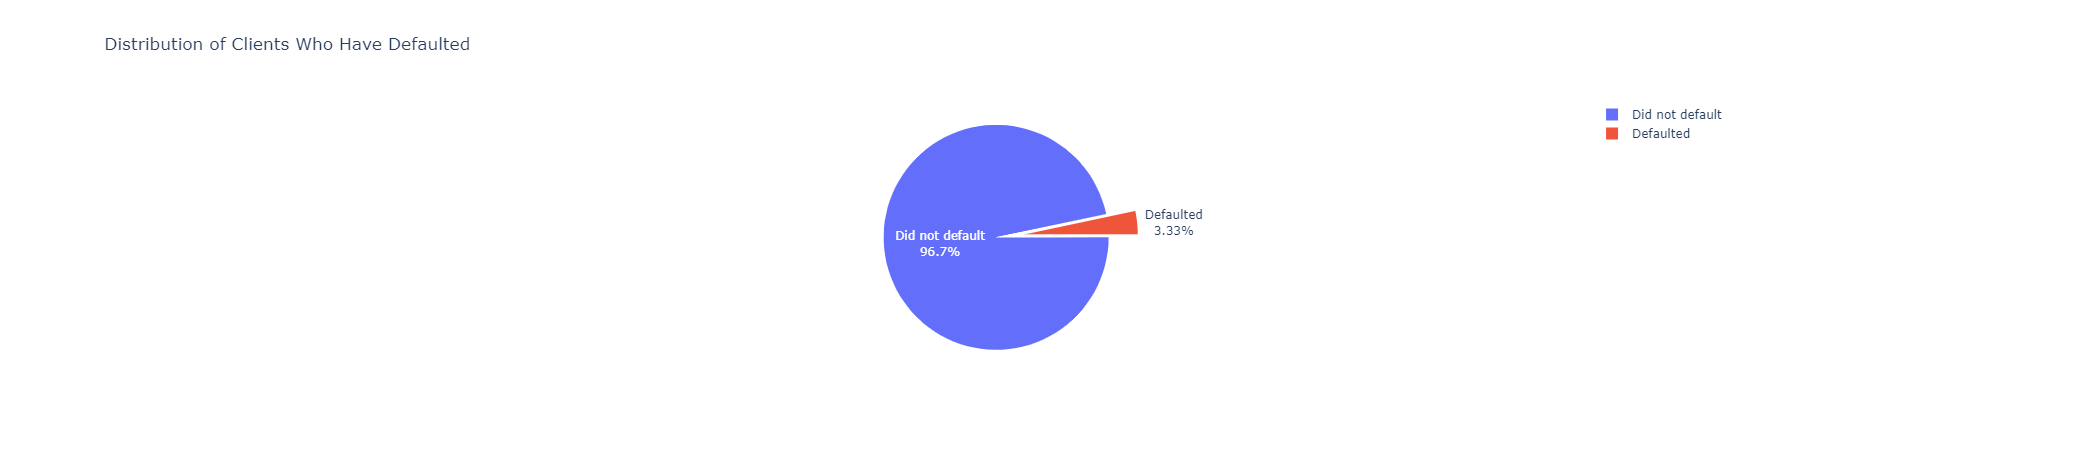

In [62]:
# Checking class balance
fig = px.pie(df, values = df['Defaulted'].value_counts(), names = ['Did not default','Defaulted'], title = 'Distribution of Clients Who Have Defaulted')
fig.update_traces(rotation=90, pull = [0.2,0.06,0.06,0.06,0.06], textinfo = "percent+label")
fig.show()

It's possible to see that most clients didn't default their loans, which means we have a **class imbalance** issue with our data.<br><br>
Later on I'll use different methods to deal with this imbalance while building our predictor model with AutoML.

Let's separate our clients among those who are employed and those who are unemployed and see how the target variable is distributed among each separate group.

In [63]:
# Separating df into two different groups: Employed clients and unemployed clients
employed = df.query("Employed == 1")
unemployed = df.query("Employed == 0")

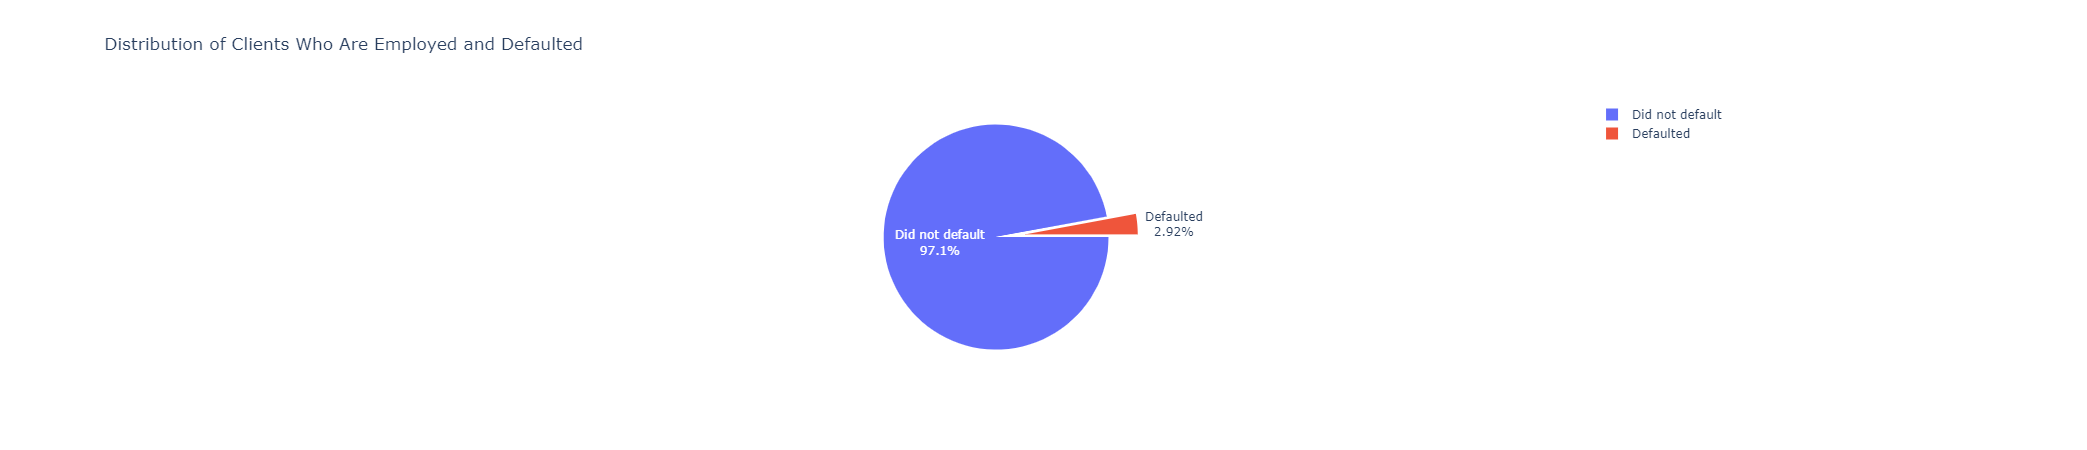

In [64]:
# Checking class balance among those who are employed
fig = px.pie(employed, values = employed['Defaulted'].value_counts(), names = ['Did not default','Defaulted'], title = 'Distribution of Clients Who Are Employed and Defaulted')
fig.update_traces(rotation=90, pull = [0.2,0.06,0.06,0.06,0.06], textinfo = "percent+label")
fig.show()

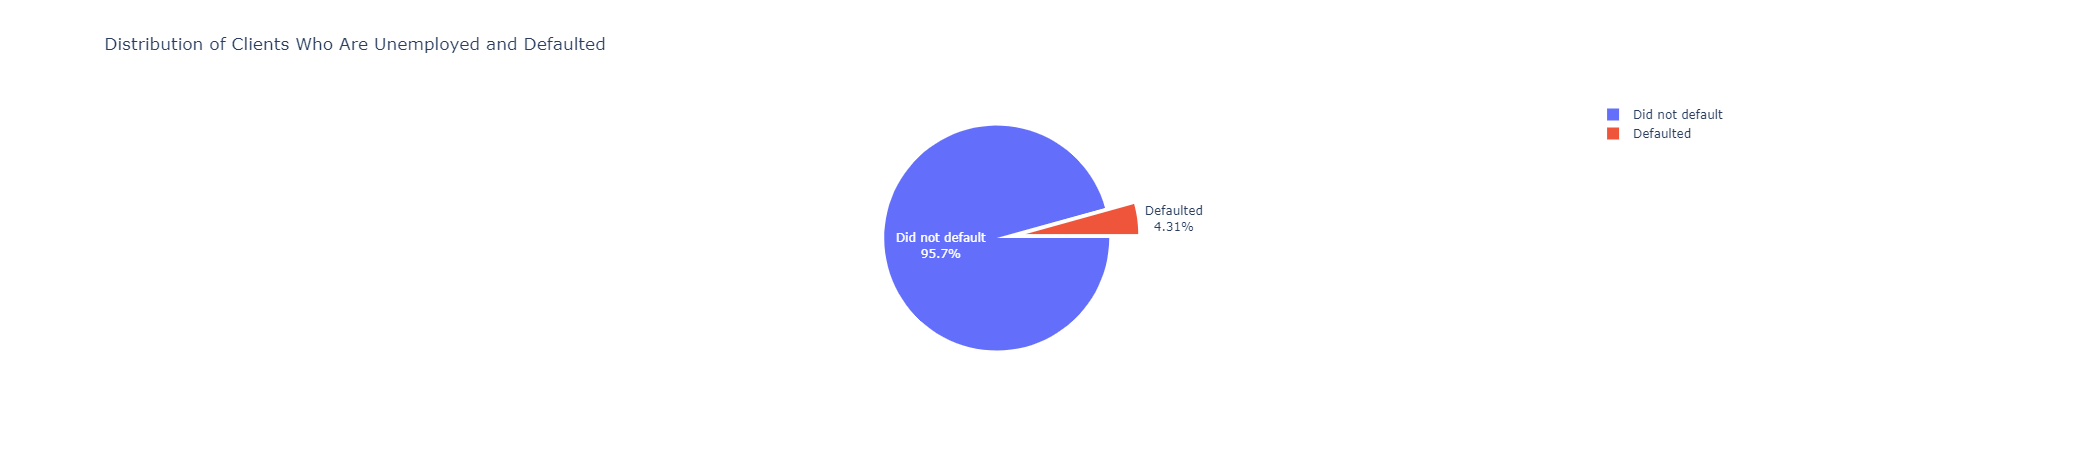

In [65]:
# Checking class balance among those who are unemployed
fig = px.pie(unemployed, values = unemployed['Defaulted'].value_counts(), names = ['Did not default','Defaulted'], title = 'Distribution of Clients Who Are Unemployed and Defaulted')
fig.update_traces(rotation=90, pull = [0.2,0.06,0.06,0.06,0.06], textinfo = "percent+label")
fig.show()

It doesn't come off as a surprise that the proportion of those who've defaulted is bigger among unmeployed clients than employed clients.

Let's now see our the 'Defaulted' class is distributed according to bank balance and annual salary.

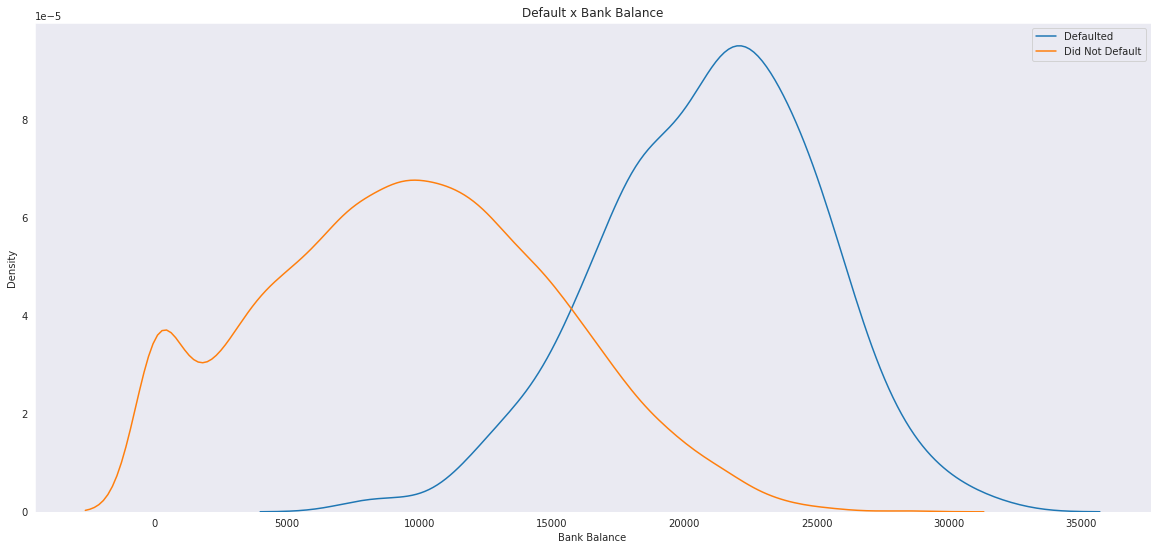

In [66]:
# Default distribution according to bank balance values
fig = plt.figure(figsize = (20, 9))
sns.set_style("dark")
sns.kdeplot(df[df['Defaulted']==1]['Bank Balance'])
sns.kdeplot(df[df['Defaulted']==0]['Bank Balance'])
plt.title('Default x Bank Balance')
plt.legend(labels=['Defaulted', 'Did Not Default'])
plt.show()

On average, we can see that clients who defaulted their loans have a higher bank balance than those who didn't.

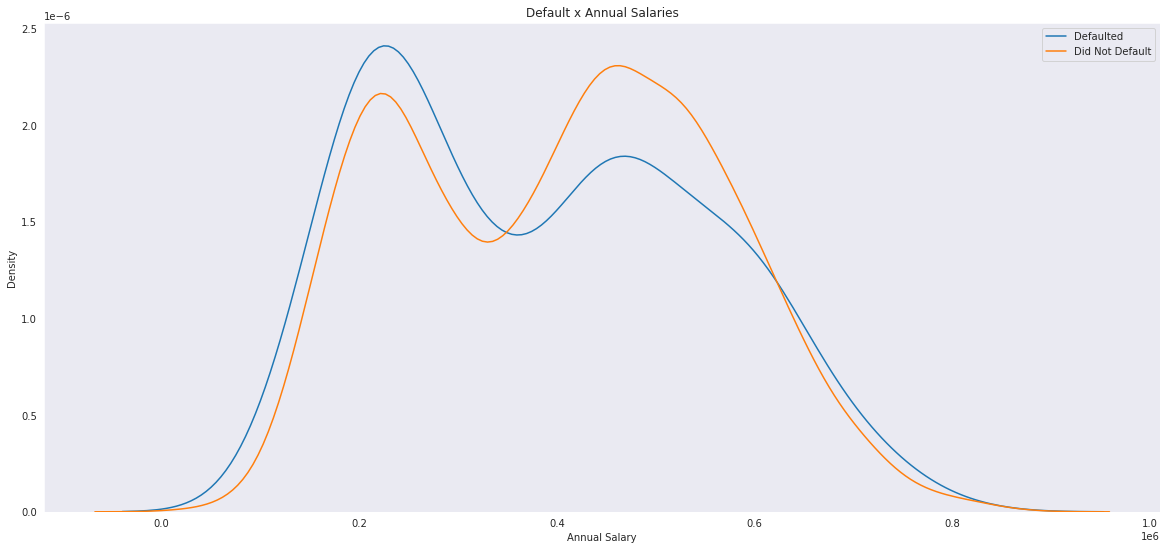

In [67]:
# Default distribution according to annual salaries
fig = plt.figure(figsize = (20, 9))
sns.set_style("dark")
sns.kdeplot(df[df['Defaulted']==1]['Annual Salary'])
sns.kdeplot(df[df['Defaulted']==0]['Annual Salary'])
plt.title('Default x Annual Salaries')
plt.legend(labels=['Defaulted', 'Did Not Default'])
plt.show()

On average, clients who defaulted have lower annual income than those who didn't.

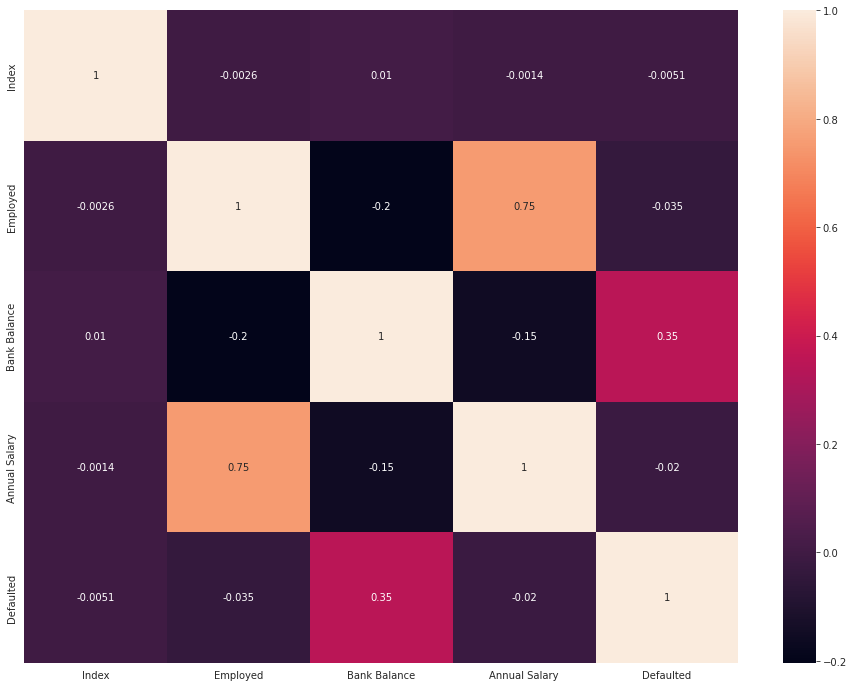

In [68]:
# Checking correlations
corr = df.corr()
plt.figure(figsize = (16, 12))
g = sns.heatmap(df.corr(), annot = True)

The strongest correlation we have is among **Annual Salary** and **Employed**, but we don't really have any strong correlation between the target variable and any other attribute. We only have a 35% correlation among **Defaulted** and **Bank Balance**, but that isn't a strong correlation at all.

<h1 style = "border-bottom: 3px solid black; padding: 8px"><b>3 | Building a Model to Predict Loan Default</b></h1>

Considering we have a big class imbalance in our target variable, the main metric that we're going to use here is the **recall score** which is going to tell us how good our model predicts the class that we want to predict, that is, customers who are more likely to default.<br><br>
We definitely want to have our **false negatives** as low as possible because giving loans to someone who is highly likely to default would implicate in financial loss to the institution, while false positives wouldn't be that much of a problem once we can check the profile of non-defaulters falsely tagged as defaulters afterwards.

Before we start, let's divide our current dataset into a Training Set and Testing Set.<br><br>
When using PyCaret, we're gonna use the Training Set to train and to validate our models on a hold-out sample.

In [74]:
test = df.tail(2000) # 20% of dataset will be used for testing
test

,Index,Employed,Bank Balance,Annual Salary,Defaulted
8000,8001,1,3649.80,286403.28,0
8001,8002,1,4243.56,488241.12,0
8002,8003,1,15233.04,468121.80,0
8003,8004,0,4770.48,272530.44,0
8004,8005,1,7286.04,594569.64,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [75]:
# Removing testing data from dataframe and setting up 80% of data left for training and validation
train = df.drop(test.index)
train

,Index,Employed,Bank Balance,Annual Salary,Defaulted
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
7995,7996,1,8095.20,807347.40,0
7996,7997,1,13173.12,506747.64,0
7997,7998,1,7116.72,573451.20,0
7998,7999,1,14005.20,431426.28,0


In [71]:
# Importing PyCaret's classification lib
from pycaret.classification import *

In [78]:
setup(# Defining training data
     data = train, 
     # defining target variable
     target = 'Defaulted',
     # 75% of training set will be used for training, 25% will be used for validation while on hold-out
     train_size = 0.75,
     # Ignore index, it won't be any relevant for model building
     ignore_features = ['Index'],
     # This param fixes class imablance with SMOTE technique, increasing the minority class
     fix_imbalance = True,
     # Normalizing features to have them all on a the same scale,
     normalize = True,
     # Transforming features into a Gaussian-like distribution)
     transformation = True)

,Description,Value
0,session_id,1350
1,Target,Defaulted
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(8000, 5)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


('1313',
       Bank Balance  Annual Salary  Employed_1
 5220      0.181285      -0.788449         0.0
 789       0.500609      -1.064966         0.0
 4809      0.771422      -1.103362         0.0
 1893      0.896838      -0.554729         0.0
 4051      1.263899       0.814263         1.0
 ...            ...            ...         ...
 3279      1.700301       0.980242         1.0
 744       0.813484       0.955810         1.0
 2036      0.098520       0.699039         1.0
 547       0.239014      -1.624023         0.0
 1515     -0.135454      -1.558620         0.0
 
 [6000 rows x 3 columns],
 True,
 'lightgbm',
 5220    0
 789     0
 4809    0
 1893    0
 4051    0
        ..
 3279    0
 744     0
 2036    0
 547     0
 1515    0
 Name: Defaulted, Length: 6000, dtype: int64,
 6501    0
 4824    0
 4994    0
 3174    0
 5334    0
        ..
 4319    0
 4340    0
 4294    0
 4416    0
 1888    0
 Name: Defaulted, Length: 2000, dtype: int64,
 False,
 False,
 None,
 {'USI',
  'X',
  'X_t

In [79]:
# Let's run a bunch of different classification algorithms and rank them by their recall score
compare_models(sort = 'Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8270,0.0000,0.9333,0.1611,0.2746,0.2285,0.3458,0.0140
lda,Linear Discriminant Analysis,0.8270,0.9552,0.9333,0.1611,0.2746,0.2285,0.3458,0.0160
qda,Quadratic Discriminant Analysis,0.8585,0.9522,0.9238,0.1894,0.3141,0.2718,0.3809,0.0130
nb,Naive Bayes,0.8482,0.9440,0.9143,0.1772,0.2967,0.2529,0.3631,0.0140
lr,Logistic Regression,0.8753,0.9551,0.9048,0.2075,0.3372,0.2972,0.3980,0.5880
svm,SVM - Linear Kernel,0.8713,0.0000,0.8810,0.2052,0.3304,0.2901,0.3866,0.0190
ada,Ada Boost Classifier,0.8728,0.9358,0.8762,0.2000,0.3254,0.2847,0.3819,0.1630
gbc,Gradient Boosting Classifier,0.8727,0.9437,0.8333,0.1937,0.3140,0.2727,0.3634,0.4160
xgboost,Extreme Gradient Boosting,0.8892,0.9257,0.7476,0.2039,0.3200,0.2805,0.3524,0.4370
catboost,CatBoost Classifier,0.8932,0.9260,0.7476,0.2117,0.3293,0.2906,0.3606,3.9490


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=1350,
                solver='auto', tol=0.001)

Let's create three different models with the top 3 best ranked algorithms, tune them, blend them and see how this affects performance!

In [80]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8400,0.0000,0.9524,0.1739,0.2941,0.2497,0.3681
1,0.8283,0.0000,0.9524,0.1639,0.2797,0.2340,0.3544
2,0.8100,0.0000,0.9524,0.1504,0.2597,0.2121,0.3350
3,0.8383,0.0000,0.9524,0.1724,0.2920,0.2474,0.3660
4,0.8267,0.0000,0.9524,0.1626,0.2778,0.2318,0.3526
5,0.8333,0.0000,0.8095,0.1504,0.2537,0.2069,0.3026
6,0.8433,0.0000,0.9048,0.1712,0.2879,0.2433,0.3530
7,0.8067,0.0000,0.9524,0.1481,0.2564,0.2085,0.3317
8,0.8100,0.0000,1.0000,0.1556,0.2692,0.2221,0.3535


In [81]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8400,0.9709,0.9524,0.1739,0.2941,0.2497,0.3681
1,0.8283,0.9588,0.9524,0.1639,0.2797,0.2340,0.3544
2,0.8100,0.9523,0.9524,0.1504,0.2597,0.2121,0.3350
3,0.8383,0.9613,0.9524,0.1724,0.2920,0.2474,0.3660
4,0.8267,0.9610,0.9524,0.1626,0.2778,0.2318,0.3526
5,0.8333,0.9002,0.8095,0.1504,0.2537,0.2069,0.3026
6,0.8433,0.9372,0.9048,0.1712,0.2879,0.2433,0.3530
7,0.8067,0.9721,0.9524,0.1481,0.2564,0.2085,0.3317
8,0.8100,0.9808,1.0000,0.1556,0.2692,0.2221,0.3535


In [82]:
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8683,0.9709,0.9524,0.2041,0.3361,0.2955,0.4065
1,0.8583,0.9481,0.9524,0.1923,0.3200,0.2779,0.3919
2,0.8417,0.9474,0.9524,0.1754,0.2963,0.2521,0.3701
3,0.8750,0.9614,0.9048,0.2065,0.3363,0.2962,0.3972
4,0.8600,0.9547,0.9524,0.1942,0.3226,0.2808,0.3943
5,0.8650,0.8973,0.7619,0.1739,0.2832,0.2399,0.3217
6,0.8633,0.9321,0.9048,0.1919,0.3167,0.2748,0.3796
7,0.8350,0.9713,0.9524,0.1695,0.2878,0.2428,0.3621
8,0.8550,0.9809,1.0000,0.1944,0.3256,0.2836,0.4065


In [83]:
# Blending models 
blended_model = blend_models(estimator_list = [ridge, lda, qda],
                            fold = 10,
                            optimize = 'Recall',
                            choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8400,0.0000,0.9524,0.1739,0.2941,0.2497,0.3681
1,0.8283,0.0000,0.9524,0.1639,0.2797,0.2340,0.3544
2,0.8100,0.0000,0.9524,0.1504,0.2597,0.2121,0.3350
3,0.8383,0.0000,0.9524,0.1724,0.2920,0.2474,0.3660
4,0.8267,0.0000,0.9524,0.1626,0.2778,0.2318,0.3526
5,0.8333,0.0000,0.8095,0.1504,0.2537,0.2069,0.3026
6,0.8433,0.0000,0.9048,0.1712,0.2879,0.2433,0.3530
7,0.8067,0.0000,0.9524,0.1481,0.2564,0.2085,0.3317
8,0.8100,0.0000,1.0000,0.1556,0.2692,0.2221,0.3535


No improvement made. Let's tune each one of our models.

In [84]:
tuned_ridge = tune_model(ridge,
                        n_iter = 1000,
                        optimize = 'Recall',
                        choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8350,0.0000,0.9524,0.1695,0.2878,0.2428,0.3621
1,0.8217,0.0000,0.9524,0.1587,0.2721,0.2256,0.3471
2,0.8167,0.0000,0.9524,0.1550,0.2667,0.2197,0.3418
3,0.8350,0.0000,0.9524,0.1695,0.2878,0.2428,0.3621
4,0.8317,0.0000,0.9524,0.1667,0.2837,0.2383,0.3582
5,0.8300,0.0000,0.8571,0.1538,0.2609,0.2142,0.3183
6,0.8450,0.0000,0.9048,0.1727,0.2901,0.2457,0.3551
7,0.8083,0.0000,0.9524,0.1493,0.2581,0.2103,0.3334
8,0.8167,0.0000,1.0000,0.1603,0.2763,0.2299,0.3603


In [85]:
tuned_lda = tune_model(lda,
                        n_iter = 1000,
                        optimize = 'Recall',
                        choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.9640,0.9524,0.1681,0.2857,0.2405,0.3601
1,0.8200,0.9585,0.9524,0.1575,0.2703,0.2236,0.3453
2,0.8233,0.9510,0.9524,0.1600,0.2740,0.2277,0.3489
3,0.8350,0.9582,0.9524,0.1695,0.2878,0.2428,0.3621
4,0.8283,0.9633,0.9524,0.1639,0.2797,0.2340,0.3544
5,0.8267,0.9056,0.8571,0.1513,0.2571,0.2101,0.3147
6,0.8417,0.9332,0.9048,0.1696,0.2857,0.2410,0.3510
7,0.8067,0.9633,0.9524,0.1481,0.2564,0.2085,0.3317
8,0.8183,0.9744,1.0000,0.1615,0.2781,0.2319,0.3621


In [86]:
tuned_qda = tune_model(qda,
                        n_iter = 1000,
                        optimize = 'Recall',
                        choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.9645,0.9524,0.1681,0.2857,0.2405,0.3601
1,0.8283,0.9574,0.9524,0.1639,0.2797,0.2340,0.3544
2,0.8233,0.9507,0.9524,0.1600,0.2740,0.2277,0.3489
3,0.8367,0.9581,0.9524,0.1709,0.2899,0.2451,0.3641
4,0.8300,0.9635,0.9524,0.1653,0.2817,0.2361,0.3563
5,0.8300,0.9062,0.8571,0.1538,0.2609,0.2142,0.3183
6,0.8417,0.9326,0.9048,0.1696,0.2857,0.2410,0.3510
7,0.8117,0.9633,0.9524,0.1515,0.2614,0.2140,0.3367
8,0.8150,0.9743,1.0000,0.1591,0.2745,0.2279,0.3586


All three models have the same recall score of 94.29%.<br><br>
Tune_qda has the best Accuracy score, 82.68%.

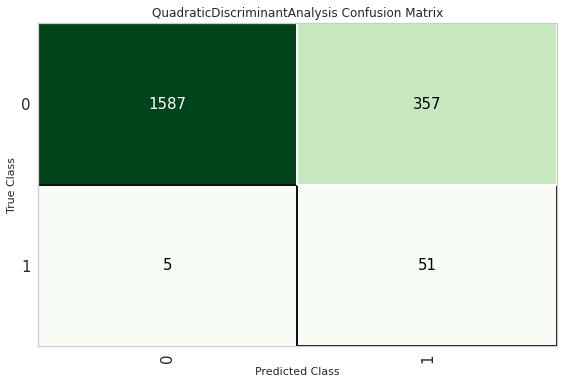

In [88]:
plot_model(tuned_qda, plot = 'confusion_matrix')

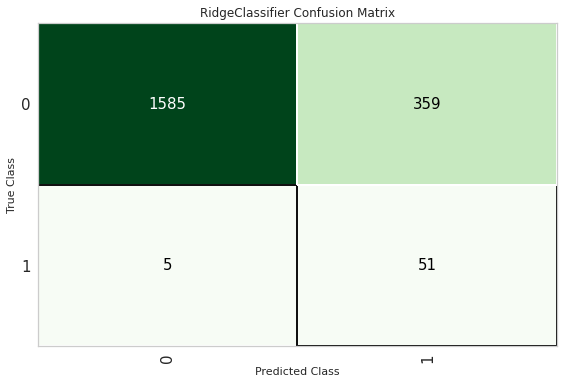

In [89]:
plot_model(tuned_ridge, plot = 'confusion_matrix')

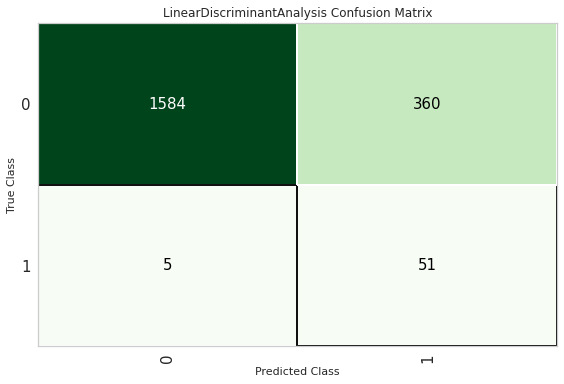

In [90]:
plot_model(tuned_lda, plot = 'confusion_matrix')

As we can see, all three models had the same value for false negatives, which was 5 defaulters predicted as non-defaulters.<br><br>
Tuned_qda had the lowest number of false positives, 357.

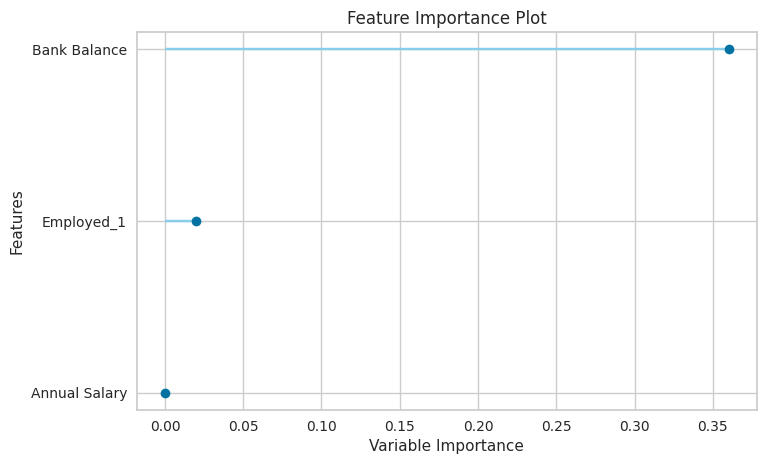

In [95]:
plot_model(tuned_ridge, plot = 'feature')

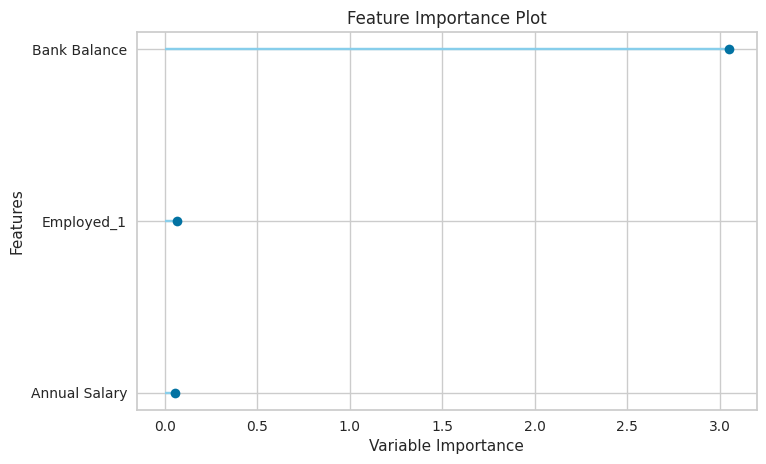

In [96]:
plot_model(tuned_lda, plot = 'feature')

**Bank Balance** seems to be the most important feature to predict default, which happens to be the feature with the highest positive correlation with the target variable

Finally, let's use our model on the hold-out sample to see how well it performs

In [97]:
predict_model(tuned_qda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.8190,0.9422,0.9107,0.1250,0.2198,0.1794,0.2977


,Bank Balance,Annual Salary,Employed_1,Defaulted,Label,Score
0,-0.898318,-0.381033,1.0,0,0,0.9923
1,1.379875,0.834074,1.0,0,1,0.7523
2,1.262584,-0.649156,1.0,0,1,0.7065
3,-0.619703,2.356562,1.0,0,0,0.9818
4,-1.239109,1.532323,1.0,0,0,0.9973
...,...,...,...,...,...,...
1995,-0.218538,0.145773,1.0,0,0,0.9436
1996,1.012615,1.378110,1.0,0,1,0.5747
1997,0.231867,-1.413375,0.0,0,0,0.8235
1998,-0.119062,0.229432,1.0,0,0,0.9267


We've achieved a recall score og 91.07% in our hold-out sample.

In [98]:
# Finalizing model before testing it with unseen data
model = finalize_model(tuned_qda)
print(model) # Printing final model

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.53,
                              store_covariance=False, tol=0.0001)


Let's now see how well our model performs with unseen data using the test set that we've created before containing the last 20% of data from the original dataset

In [99]:
test # testing set

,Index,Employed,Bank Balance,Annual Salary,Defaulted
8000,8001,1,3649.80,286403.28,0
8001,8002,1,4243.56,488241.12,0
8002,8003,1,15233.04,468121.80,0
8003,8004,0,4770.48,272530.44,0
8004,8005,1,7286.04,594569.64,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [100]:
predictions = predict_model(model, data = test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.8190,0.9349,0.9104,0.1463,0.2521,0.2062,0.3217


In [101]:
predictions

,Index,Employed,Bank Balance,Annual Salary,Defaulted,Label,Score
8000,8001,1,3649.80,286403.28,0,0,0.9955
8001,8002,1,4243.56,488241.12,0,0,0.9934
8002,8003,1,15233.04,468121.80,0,1,0.5232
8003,8004,0,4770.48,272530.44,0,0,0.9910
8004,8005,1,7286.04,594569.64,0,0,0.9643
...,...,...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0,0,0.9342
9996,9997,1,9095.52,235928.64,0,0,0.9213
9997,9998,1,10144.92,703633.92,0,0,0.8669
9998,9999,1,18828.12,440029.32,0,1,0.7819


#### **Recall Score on Testing Set** ==> 91.04%

Let's print a confusion matrix

In [102]:
y_test = predictions.Defaulted
pred = predictions.Label

/root/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/root/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/root/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/root/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/root/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coe

In [107]:
y_test.value_counts()

0    1933
1      67
Name: Defaulted, dtype: int64

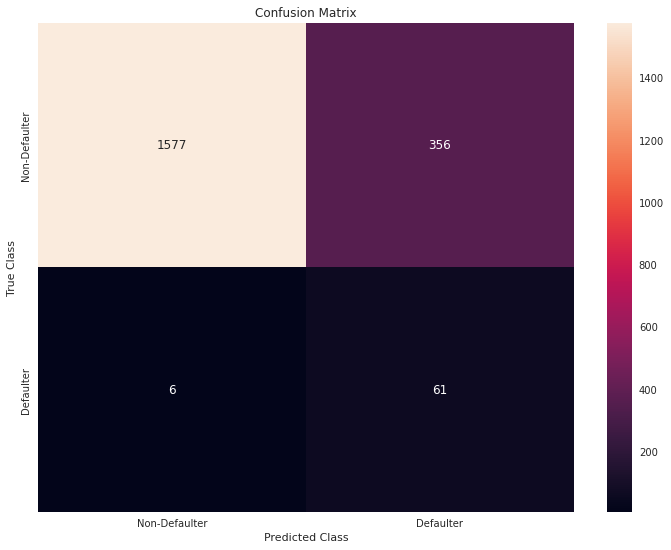

In [106]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12,9))
ax = plt.subplot()
sns.heatmap(cm,annot = True, fmt ='g', ax = ax)
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Non-Defaulter','Defaulter'])
ax.yaxis.set_ticklabels(['Non-Defaulter','Defaulter'])
plt.show()

We've had only 6 false negatives in a dataset with 67 defaulters in total, where 61 of them were correctly predicted as defaulters.

<h1 style = "border-bottom: 3px solid black; padding: 8px"><b>4 | Conclusion</b></h1>

Considering that labeling a defaulter as a non-defaulter represents a high chance of financial loss to the institution, the goal of this model was to have the highest recall possible and correctly predict the highest amount of defaulters as possible.<br><br>
Through an AutoML library called PyCaret, we could successfully run 16 different classification algorithms and find the one with the best recall performance.
After tuning it and testing it, we've achieved a 91.04% recall score on unseen data and correctly predicted 61 defaulters among 67 of them.<br><br><br>
I hope you liked following through this project. If you did, leave an upvote! Don't forget to leave comments and suggestions.<br><br>
Thank you! <br><br><br>
*Luís Fernando Torres*